In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\mccmrfcs\Downloads\crime_dataset_india.csv'  # Adjust path as needed
df = pd.read_csv(file_path)

C:\Users\mccmrfcs\AppData\Local\Temp\ipykernel_5764\3735676828.py:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


# DATA CLEANING

In [6]:
# Convert date columns to datetime format
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce')
df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], errors='coerce')

# Clean 'Case Closed' column
df['Case Closed'] = df['Case Closed'].str.strip().str.lower()

# Filter for closed cases only
closed_cases = df[df['Case Closed'] == 'yes'].copy()

# Calculate closure time in days
closed_cases['Closure Time (Days)'] = (closed_cases['Date Case Closed'] - closed_cases['Date Reported']).dt.days

# Group by city and calculate metrics
closure_stats = closed_cases.groupby('City').agg(
    Total_Closed_Cases=('Report Number', 'count'),
    Average_Closure_Time_Days=('Closure Time (Days)', 'mean')
)

# Get total reported cases per city
total_cases = df.groupby('City')['Report Number'].count().rename("Total_Cases")

# Join to get closure rate
closure_stats = closure_stats.join(total_cases)
closure_stats['Closure Rate (%)'] = (closure_stats['Total_Closed_Cases'] / closure_stats['Total_Cases']) * 100

# Sort by closure rate
closure_stats_sorted = closure_stats.sort_values(by='Closure Rate (%)', ascending=False)

C:\Users\mccmrfcs\AppData\Local\Temp\ipykernel_5764\3435049177.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], errors='coerce')


# 1. Plotting Top 10 Cities by Crime Closure Rate & Bottom 10 Cities by Crime Closure Rate

In [7]:
# Get top and bottom 10 cities
top_10 = closure_stats_sorted.head(10)
bottom_10 = closure_stats_sorted.tail(10)

C:\Users\mccmrfcs\AppData\Local\Temp\ipykernel_5764\2988800437.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


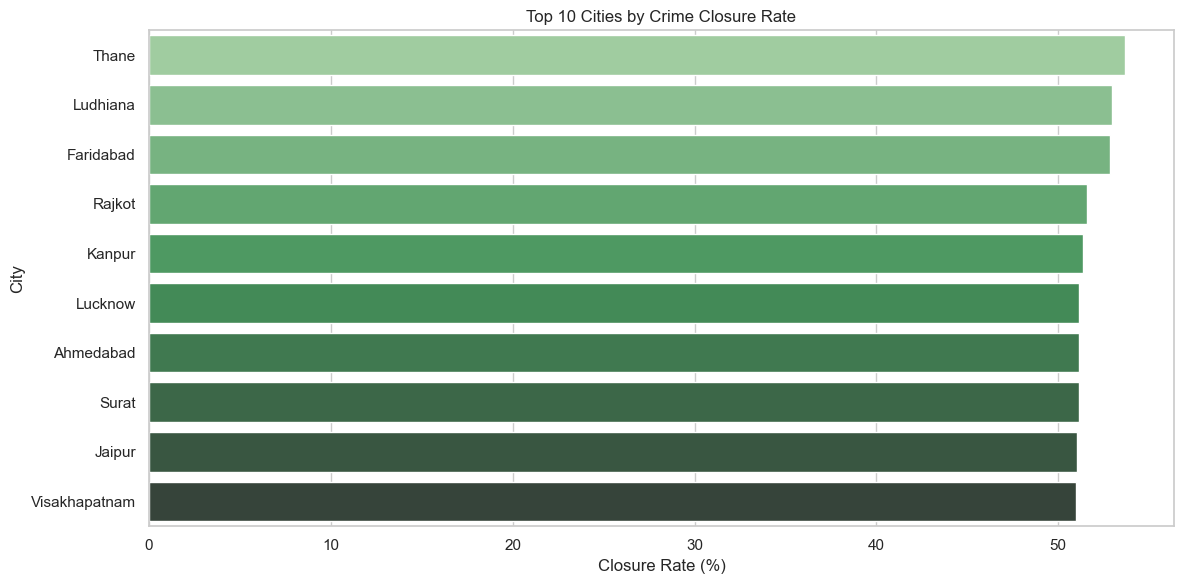

C:\Users\mccmrfcs\AppData\Local\Temp\ipykernel_5764\2988800437.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


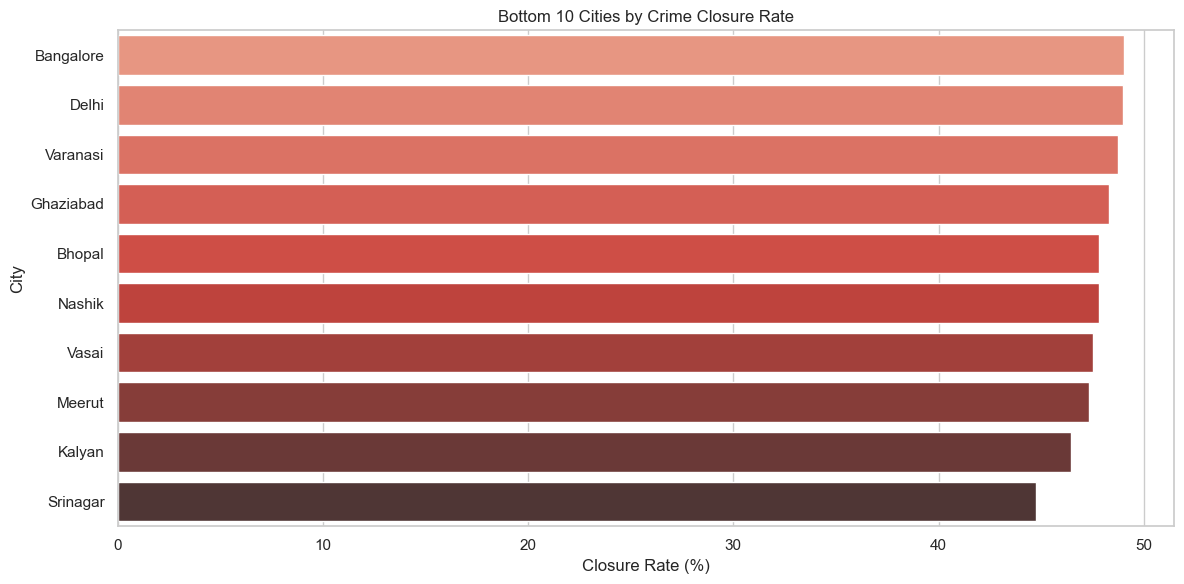

In [8]:
# Plot settings
sns.set(style="whitegrid")

# Top 10 Cities by Closure Rate
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10['Closure Rate (%)'],
    y=top_10.index,
    palette="Greens_d"
)
plt.title("Top 10 Cities by Crime Closure Rate")
plt.xlabel("Closure Rate (%)")
plt.ylabel("City")
plt.tight_layout()
plt.show()

# Bottom 10 Cities by Closure Rate
plt.figure(figsize=(12, 6))
sns.barplot(
    x=bottom_10['Closure Rate (%)'],
    y=bottom_10.index,
    palette="Reds_d"
)
plt.title("Bottom 10 Cities by Crime Closure Rate")
plt.xlabel("Closure Rate (%)")
plt.ylabel("City")
plt.tight_layout()
plt.show()


 ✅ Top 10 Cities by Crime Closure Rate
Cities like Thane, Ludhiana, and Faridabad lead with over 52% of crimes being closed.
These cities generally balance closure speed and volume.

❌ Bottom 10 Cities by Crime Closure Rate
Cities like Srinagar, Kalyan, and Meerut show lower effectiveness, with closure rates below 48%.
ome of these cities also exhibit longer average closure times.

# 2. Crime Trends by Hour

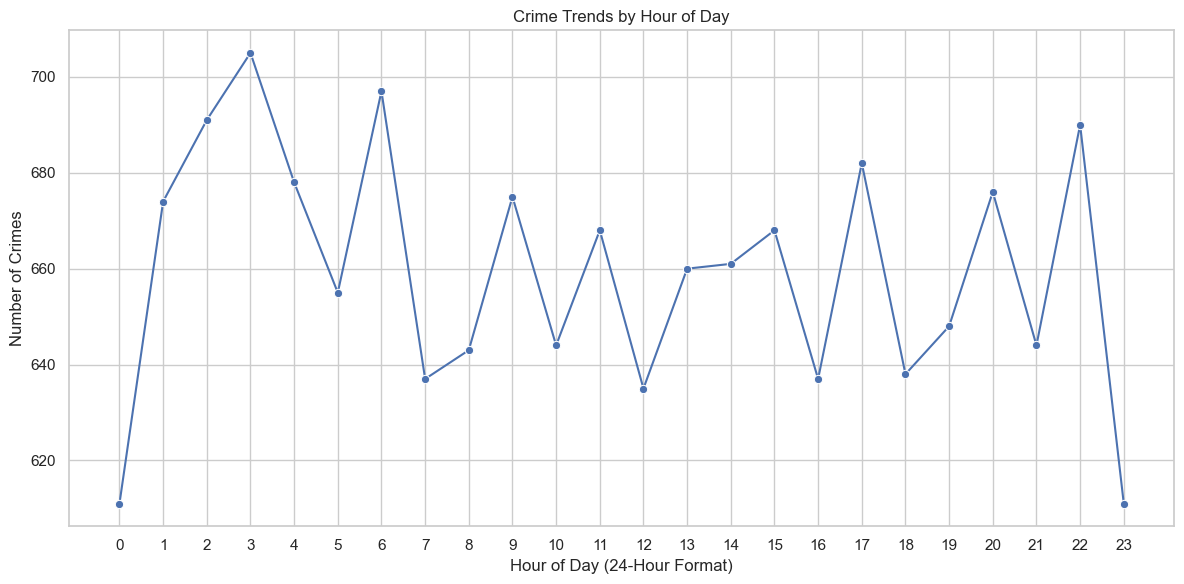

In [10]:
df['Time of Occurrence'] = pd.to_datetime(df['Time of Occurrence'], errors='coerce')

# Extract hour (0 to 23)
df['Hour of Occurrence'] = df['Time of Occurrence'].dt.hour

# Count number of crimes per hour
hourly_crime_trends = df.groupby('Hour of Occurrence')['Report Number'].count().reset_index()
hourly_crime_trends.columns = ['Hour', 'Crime Count']

# Plotting
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(data=hourly_crime_trends, x='Hour', y='Crime Count', marker='o')
plt.title("Crime Trends by Hour of Day")
plt.xlabel("Hour of Day (24-Hour Format)")
plt.ylabel("Number of Crimes")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

# Outliers in Crime Types per City 

C:\Users\mccmrfcs\AppData\Local\Temp\ipykernel_5764\161562239.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Crime Description", y="Count", data=long_form_data, palette='Set2')


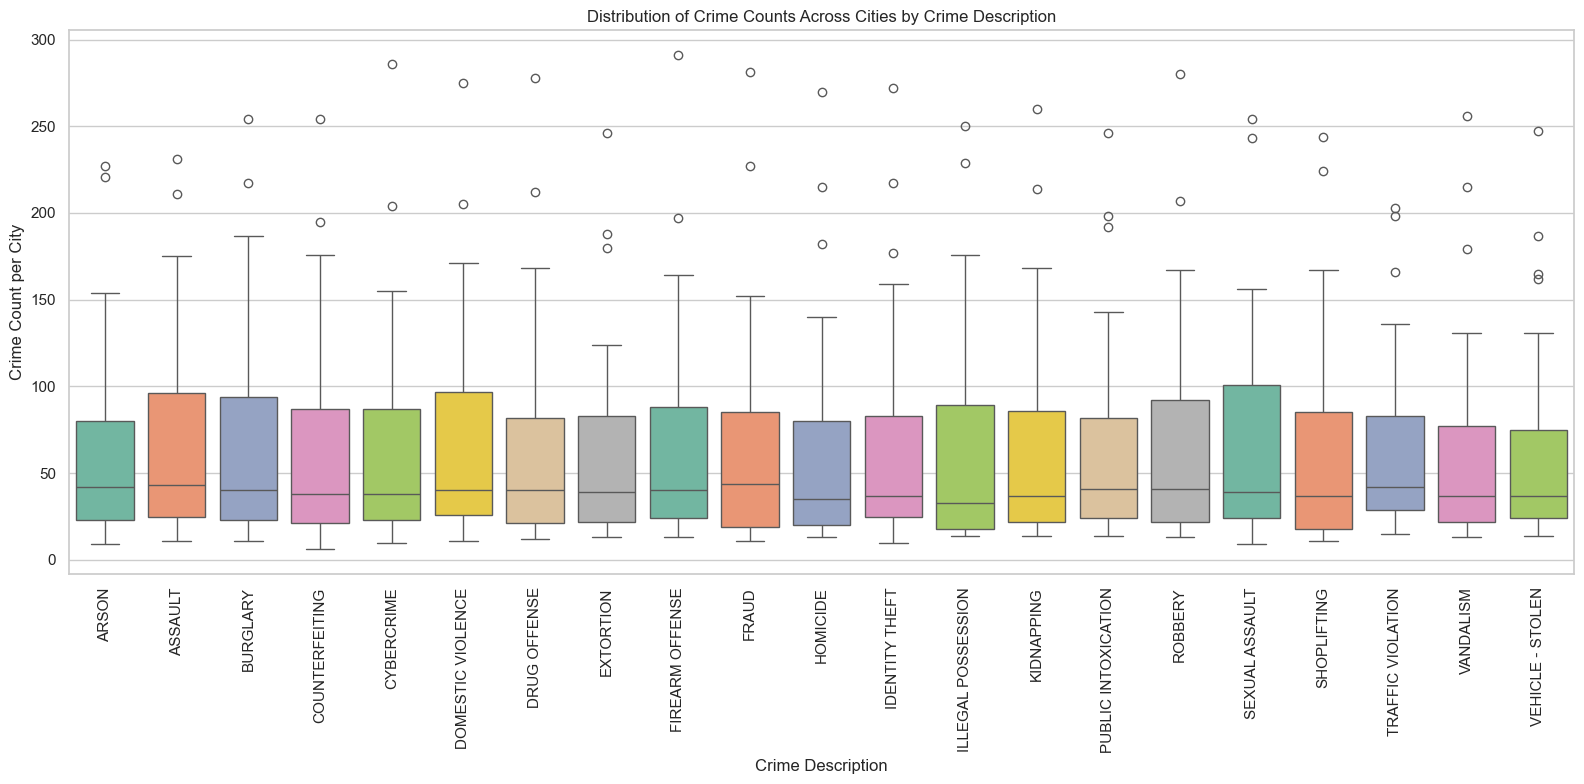

In [22]:
# Drop empty or irrelevant columns
crime_data_cleaned = df.drop(columns=["Unnamed: 14", "Unnamed: 15"], errors='ignore')

# Group by City and Crime Description to get the count
long_form_data = crime_data_cleaned.groupby(["City", "Crime Description"]).size().reset_index(name='Count')

# Set up the plot
plt.figure(figsize=(16, 8))
sns.boxplot(x="Crime Description", y="Count", data=long_form_data, palette='Set2')

# Customize the plot
plt.xticks(rotation=90)
plt.title("Distribution of Crime Counts Across Cities by Crime Description")
plt.ylabel("Crime Count per City")
plt.xlabel("Crime Description")
plt.tight_layout()

# Show the plot
plt.show()

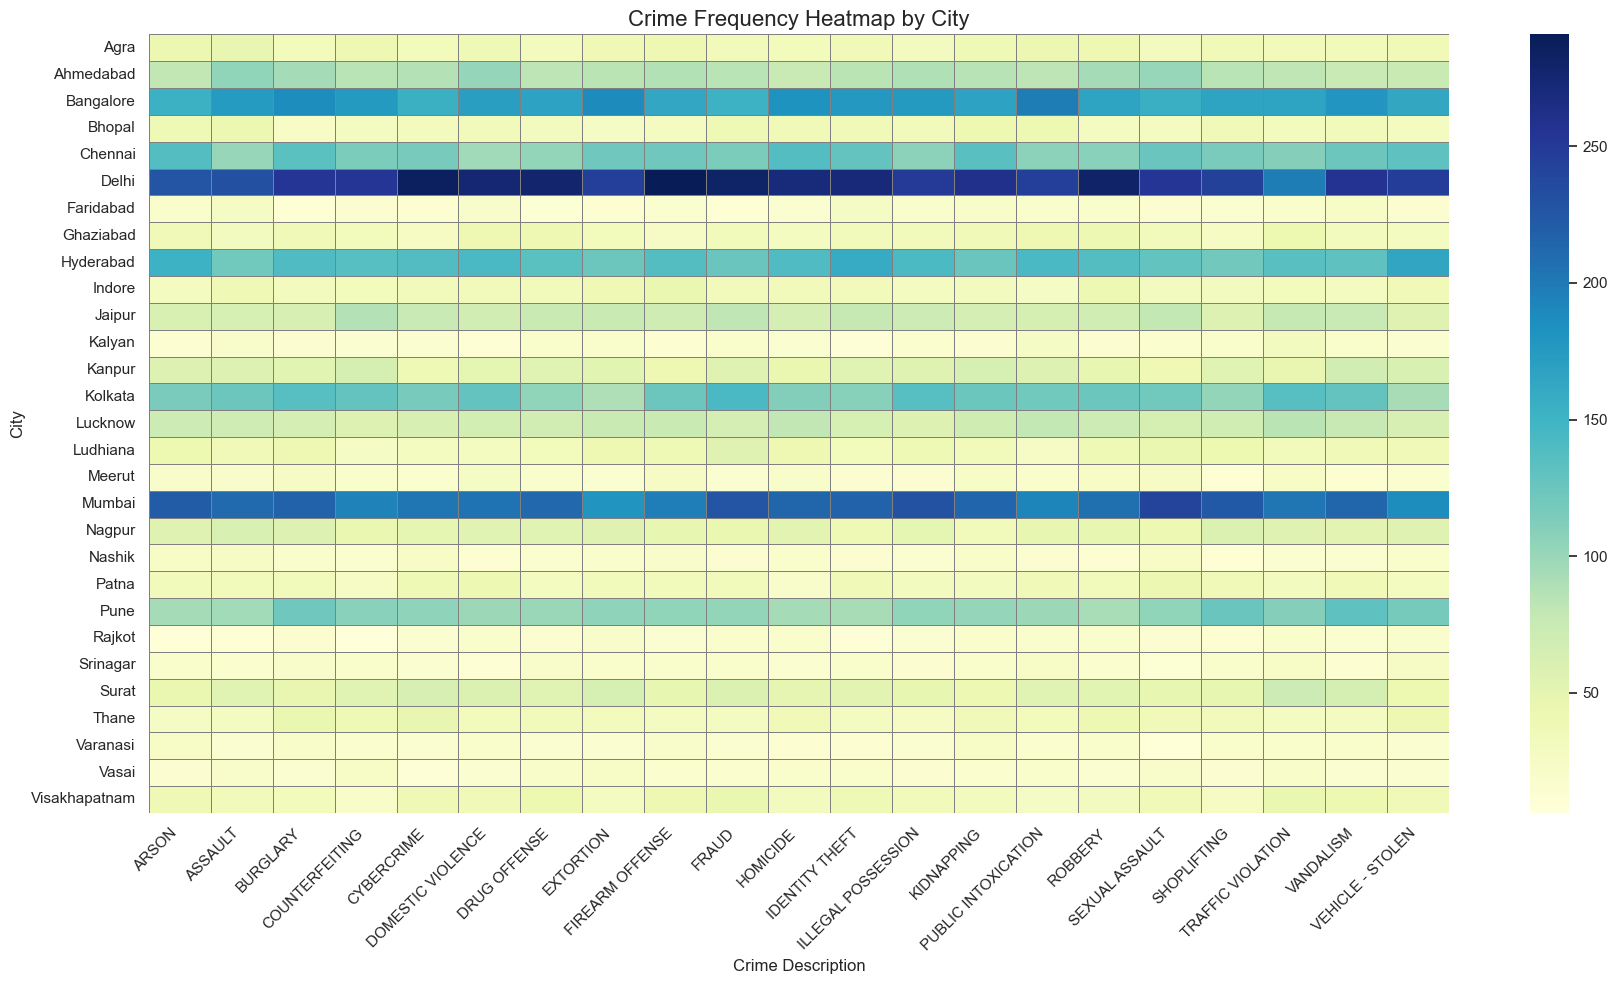

In [24]:
# Drop empty or irrelevant columns
crime_data_cleaned = df.drop(columns=["Unnamed: 14", "Unnamed: 15"], errors='ignore')

# Group by City and Crime Description and count the number of incidents
city_crime_counts = crime_data_cleaned.groupby(["City", "Crime Description"]).size().reset_index(name='Count')

# Pivot the data to create a matrix with cities as rows and crime types as columns
heatmap_data = city_crime_counts.pivot(index="City", columns="Crime Description", values="Count").fillna(0)

# Plot the heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, linecolor='gray')

# Customize the plot
plt.title("Crime Frequency Heatmap by City", fontsize=16)
plt.xlabel("Crime Description", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()